### Title: **Interactive Question Answering System Using BERT**

### Description:
This project implements an interactive Question Answering (QA) system utilizing the **BERT (Bidirectional Encoder Representations from Transformers)** model, a state-of-the-art pre-trained transformer model for natural language understanding. By leveraging the power of **Hugging Face's Transformers library**, the system is capable of processing a text passage and answering user queries based on the provided information.

**Key Features:**
- **BERT for QA**: The system uses the fine-tuned BERT model (`bert-large-uncased-whole-word-masking-finetuned-squad`) that is pretrained on the SQuAD (Stanford Question Answering Dataset) to answer questions based on a given context.
- **Interactive Loop**: Users can enter any text and repeatedly ask questions related to that text. The system answers the questions using the BERT model and allows users to continue querying or exit when finished.
- **Dynamic Input and Output**: The system handles dynamic user input, providing real-time answers and allowing follow-up questions in a conversational format.

This project demonstrates how transformer-based models, particularly BERT, can be applied in an interactive and engaging manner for real-world question answering applications.

### Installing the `transformers` Library

This part of the project involves installing the `transformers` library, which is developed by Hugging Face. This library provides pre-trained models for various natural language processing tasks, including BERT, GPT, and others. By using `transformers`, we can leverage these advanced models to perform tasks like text classification, named entity recognition, and more. The library makes it easy to load and fine-tune these models, which is crucial for implementing BERT-based models in our project.

In [1]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable


### Importing Required Libraries for Question Answering with BERT

In this part of the project, we import several essential libraries and modules to perform the task of question answering using BERT:

- **pandas**: A powerful library for data manipulation and analysis. It helps in loading, cleaning, and managing the data (like question-context pairs) in a structured format (e.g., DataFrame).
  
- **numpy**: A library for numerical computing, useful for handling arrays and mathematical operations, especially when working with the input and output data of the model.

- **seaborn**: A Python data visualization library based on matplotlib, used for generating informative and attractive visualizations, which can help in analyzing the model’s performance.

- **torch**: The PyTorch library, which is the deep learning framework that BERT is built on. It enables tensor computations and provides a wide range of tools to implement and train machine learning models.

- **matplotlib.pyplot**: A plotting library used to create static, animated, and interactive visualizations. It is often used for visualizing the model's results, like showing training curves or output statistics.

- **BertForQuestionAnswering**: A specific class from the Hugging Face Transformers library that provides the pre-trained BERT model fine-tuned for the question answering task. This model takes a context and a question as inputs and predicts an answer from the context.

- **BertTokenizer**: This tokenizer from the Hugging Face library is used to convert the input text (question and context) into tokens that the BERT model can process. It ensures that the text is tokenized, padded, and truncated appropriately to fit the input size required by BERT.

These libraries collectively provide the necessary tools to build and run a BERT-based question answering model, leveraging the power of pre-trained models for extracting relevant answers from text data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import matplotlib.pyplot as plt
from transformers import BertForQuestionAnswering, BertTokenizer


C:\Users\nisha\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading the CoQA Dataset

In this part of the project, we load the **CoQA** (Conversational Question Answering) dataset, which is a popular dataset for training and evaluating question-answering models in a conversational context. Here's a breakdown of the code:

- **`pd.read_json()`**: This function from the pandas library is used to load the JSON dataset from the provided URL. The CoQA dataset is in JSON format and contains training examples, each consisting of a context (paragraph of text), a series of questions, and the corresponding answers.

- **`coqa.head()`**: After loading the dataset, we use the `.head()` function to preview the first few rows of the data. This helps us verify the structure of the dataset and understand how the data is organized before processing it for model training.

By using this dataset, the model will learn to provide accurate answers based on the context and conversational history. The dataset is specifically designed for conversational AI tasks, making it a great choice for training models like BERT for question answering.

In [3]:
coqa = pd.read_json('http://downloads.cs.stanford.edu/nlp/data/coqa/coqa-train-v1.0.json')
coqa.head()

,version,data
0,1,"{'source': 'wikipedia', 'id': '3zotghdk5ibi9ce..."
1,1,"{'source': 'cnn', 'id': '3wj1oxy92agboo5nlq4r7..."
2,1,"{'source': 'gutenberg', 'id': '3bdcf01ogxu7zdn..."
3,1,"{'source': 'cnn', 'id': '3ewijtffvo7wwchw6rtya..."
4,1,"{'source': 'gutenberg', 'id': '3urfvvm165iantk..."


### Removing Unnecessary Columns

In this step, we remove the **"version"** column from the CoQA dataset, as it is not relevant for the question-answering task. Here's the explanation:

- **`del coqa["version"]`**: This command deletes the "version" column from the `coqa` DataFrame. Sometimes, datasets come with extra metadata or columns that do not contribute to the task at hand. By removing such columns, we can simplify the dataset and focus on the relevant features, such as the context, question, and answer.

This helps clean the dataset and makes it easier to work with when preparing it for training the model.

In [4]:
del coqa["version"]

### Data Processing and Reshaping

This section of the code is used to reshape the CoQA dataset into a more usable format for training the BERT-based question-answering model.

- **`cols = ["text","question","answer"]`**: We define the column names for our new DataFrame, where:
  - "text" will contain the context or story from the CoQA dataset.
  - "question" will contain the actual question for each context.
  - "answer" will contain the corresponding answer for each question.

- **Reshaping the dataset**: We iterate over the dataset and extract relevant information:
  - **For each story** (`row["data"]["story"]`), the code extracts all the questions and answers related to that story.
  - **For each question** in the story, it stores the context (story), the question, and the corresponding answer in a temporary list (`temp_list`).
  - This process is repeated for all the questions and answers associated with each story in the dataset.

- **Creating the new DataFrame**: After extracting the relevant data, the `comp_list` holds a list of lists, where each sublist contains a story, a question, and an answer. This list is then converted into a DataFrame, `new_df`, which is easier to work with for model training.

This step prepares the dataset for training by ensuring it has the proper structure for input into the BERT model for question-answering tasks.

In [5]:
cols = ["text","question","answer"]

# j = 1
comp_list = []
for index, row in coqa.iterrows():
    for i in range(len(row["data"]["questions"])):
        temp_list = []
#         temp_list.append(j)
        temp_list.append(row["data"]["story"])
        temp_list.append(row["data"]["questions"][i]["input_text"])
        temp_list.append(row["data"]["answers"][i]["input_text"])
        comp_list.append(temp_list)
#     j += 1
new_df = pd.DataFrame(comp_list, columns=cols) 

### Saving the Preprocessed Data

In this step, the reshaped CoQA dataset, `new_df`, is saved as a CSV file:

- **`new_df.to_csv("CoQA_data.csv", index=False)`**: This line of code converts the `new_df` DataFrame into a CSV file named `CoQA_data.csv`. The `index=False` parameter ensures that the row indices are not included in the saved CSV file, resulting in a clean dataset that only contains the "text", "question", and "answer" columns.

This CSV file can now be used as input for training and fine-tuning the BERT model on the question-answering task.

In [6]:
new_df.to_csv("CoQA_data.csv", index=False)

### Loading the Preprocessed Data

Here, the CSV file `CoQA_data.csv` is loaded back into a DataFrame for further processing:

- **`data = pd.read_csv("CoQA_data.csv")`**: This line reads the CSV file and stores it into the `data` DataFrame. The file `CoQA_data.csv` contains the preprocessed CoQA dataset, which consists of the "text", "question", and "answer" columns.

- **`data.head()`**: This command displays the first five rows of the DataFrame, allowing a quick preview of the dataset's structure and the values within it.

This step ensures that the data is ready for input into the model for fine-tuning, as we can easily visualize and verify the contents.

In [7]:
data = pd.read_csv("CoQA_data.csv")
data.head()

,text,question,answer
0,"The Vatican Apostolic Library (), more commonl...",When was the Vat formally opened?,It was formally established in 1475
1,"The Vatican Apostolic Library (), more commonl...",what is the library for?,research
2,"The Vatican Apostolic Library (), more commonl...",for what subjects?,"history, and law"
3,"The Vatican Apostolic Library (), more commonl...",and?,"philosophy, science and theology"
4,"The Vatican Apostolic Library (), more commonl...",what was started in 2014?,a project


### Checking the Number of Question-Answer Pairs

- **`print("Number of question and answers: ", len(data))`**: This line of code calculates and prints the total number of question-answer pairs in the dataset. The length of the DataFrame `data` corresponds to the number of rows, which is equal to the number of question-answer pairs in the CoQA dataset after preprocessing.

This helps us understand how much data is available for model training or testing.

In [8]:
print("Number of question and answers: ", len(data))

Number of question and answers:  108647


### Loading the Pre-trained BERT Model and Tokenizer

- **`model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')`**: 
  - This line loads the pre-trained BERT model fine-tuned on the SQuAD dataset for question answering. The model is `bert-large-uncased-whole-word-masking-finetuned-squad`, a large version of BERT trained for answering questions based on a given context. This model can process text input to extract an answer based on the context and the question provided.

- **`tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')`**: 
  - This line loads the tokenizer associated with the BERT model. The tokenizer is responsible for converting input text into a format that BERT can understand (i.e., tokenized input), ensuring that the text is tokenized in a manner consistent with the model's pre-training. It also ensures that the tokens are aligned with the fine-tuning performed on the SQuAD dataset.

These components (model and tokenizer) are essential for performing question answering tasks using BERT.

In [9]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Selecting a Random Question and Context

- **`random_num = np.random.randint(0, len(data))`**: 
  - This line generates a random integer, `random_num`, between `0` and the length of the dataset (`len(data)`). This random number will be used to select a random sample from the data.

- **`question = data["question"][random_num]`**:
  - Using the randomly generated index (`random_num`), this line selects a random question from the dataset's `question` column. The `question` column contains the questions associated with each context in the dataset.

- **`text = data["text"][random_num]`**:
  - Similarly, this line selects the corresponding context (the "story" or "text") for the randomly selected question. The `text` column contains the context that will be used by the BERT model to find the answer to the question.

This selection of a random question and context is used as input for the BERT model to perform question answering.

In [10]:
random_num = np.random.randint(0,len(data))

question = data["question"][random_num]
text = data["text"][random_num]

### Printing the Selected Question and Context

- **`print(question, "\n", text)`**: 
  - This line prints out the randomly selected question followed by its associated context (story or text). The `"\n"` is used to add a line break between the question and the context, making the output more readable.

By executing this, we get a clearer view of both the question and the context that the BERT model will use for answering the question. Here's an example of what the printed output might look like:

```
What is the capital of France? 
The capital of France is Paris, which is located in Europe.
``` 

This output will help ensure that the question-answering process is working with appropriate input.

In [11]:
print(question, "\n", text)

What did his mother do? 
 Sam hated doing chores. And he had many chores. For example,on Mondays, Wednesdays and Fridays he took out the rubbish. And on weekends he always washed his father's car. He also cleaned his own room once a week. What a chore that was! Sometimes he even had to look after his little sister and brother. Sam had a foreign friend at school. His name was Kumar. Doing chores in Kumar's family was very different. In the house only the girls did chores. His sisters made all the beds and cleaned all the rooms too, even his bedroom.His mother always cooked the meals, and his sisters helped her to go shopping, and prepare the food. They worked hard at home,doing all the chores with their mother. So when Kumar talked to his friend Sam about chores, he felt very lucky. One day, Sam had an idea. He asked Kumar,"Could I borrow your sisters? " He wanted them to help him clean his room,but they said " no " Instead, they asked Sam to teach their brother how to do chores, so he 

### Tokenizing the Question and Context

- **`input_ids = tokenizer.encode(question, text)`**: 
  - This line encodes the `question` and `text` (context) into input tokens using the BERT tokenizer. The tokenizer transforms the question and its context into a sequence of integer token IDs that represent words or subwords, based on the model's vocabulary.

- **`print("The input has a total of {} tokens.".format(len(input_ids)))`**: 
  - This line calculates the length of the tokenized input (i.e., the total number of tokens) and prints it. This is important because BERT has a fixed maximum sequence length, typically 512 tokens. If the length exceeds this limit, the input must be truncated.

By running this code, you'll know the number of tokens that BERT will process. If the total token count exceeds the model's maximum limit, you'll need to truncate or modify the input to fit within that constraint. For example, if the model’s limit is 512 tokens and the sum of the tokens from the question and text exceeds that, truncation would occur.

In [12]:
input_ids = tokenizer.encode(question, text)
print("The input has a total of {} tokens.".format(len(input_ids)))

The input has a total of 281 tokens.


### Converting Token IDs to Tokens

- **`tokens = tokenizer.convert_ids_to_tokens(input_ids)`**: 
  - This line converts the list of token IDs back into human-readable tokens (words or subwords). The `input_ids` list contains the token IDs representing words or parts of words in the text, and the `convert_ids_to_tokens()` method maps these token IDs back to their corresponding text representations (tokens).

- **`for token, id in zip(tokens, input_ids):`**: 
  - This loop iterates over the tokens and their corresponding token IDs. The `zip()` function pairs each token with its corresponding token ID from the input list.

- **`print('{:8}{:8,}'.format(token, id))`**: 
  - This line prints each token alongside its token ID. The `{:8}` formats the output so that the token and its ID are aligned in a neat tabular format, making it easier to read.

#### Example Output:

You might see an output like this:

```
[CLS]    101,000
hello    7592,000
world    2088,000
[SEP]    102,000
```

Here, each token corresponds to a part of the question and context, and the number beside it represents the token ID in BERT's vocabulary. Special tokens like `[CLS]` (start of sequence) and `[SEP]` (separator between question and context) are included as part of BERT's input format.

In [13]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)

for token, id in zip(tokens, input_ids):
    print('{:8}{:8,}'.format(token,id))

[CLS]        101
what       2,054
did        2,106
his        2,010
mother     2,388
do         2,079
?          1,029
[SEP]        102
sam        3,520
hated      6,283
doing      2,725
chores    27,091
.          1,012
and        1,998
he         2,002
had        2,018
many       2,116
chores    27,091
.          1,012
for        2,005
example    2,742
,          1,010
on         2,006
mondays   28,401
,          1,010
wednesday   9,317
##s        2,015
and        1,998
fridays   26,587
he         2,002
took       2,165
out        2,041
the        1,996
rubbish   29,132
.          1,012
and        1,998
on         2,006
weekends  13,499
he         2,002
always     2,467
washed     8,871
his        2,010
father     2,269
'          1,005
s          1,055
car        2,482
.          1,012
he         2,002
also       2,036
cleaned   12,176
his        2,010
own        2,219
room       2,282
once       2,320
a          1,037
week       2,733
.          1,012
what       2,054
a          1,

### Segmenting the Input into Two Segments (Question and Text)

In this part of the code, the input tokens are divided into two segments: **Segment A** (the question) and **Segment B** (the context or text). This segmentation is crucial for BERT's question-answering task, as it helps the model differentiate between the question and the context.

1. **Identifying the `[SEP]` Token**:  
   The first occurrence of the `[SEP]` token (which separates the question and context in BERT's input format) is found using the `index()` method. The position of this token helps us determine where the question ends and where the text begins.

2. **Determining the Length of Each Segment**:
   - **Segment A** represents the question, and its length is calculated as the position of the `[SEP]` token plus one.
   - **Segment B** represents the context or text, and its length is calculated as the total number of tokens minus the length of Segment A.

3. **Creating Segment IDs**:
   Segment IDs are created to mark which tokens belong to the question (Segment A) and which belong to the text (Segment B). The segment IDs are a list of `0`s for the question and `1`s for the text. This helps the model differentiate between the two parts during processing.

Finally, an assertion is performed to ensure that the lengths of `segment_ids` and `input_ids` are the same, ensuring the segmentation is done correctly.

This process sets up the input in a way that is compatible with BERT's architecture, where each token is associated with either the question or the text.

In [14]:
#first occurence of [SEP] token
sep_idx = input_ids.index(tokenizer.sep_token_id)
print(sep_idx)

#number of tokens in segment A - question
num_seg_a = sep_idx+1
print(num_seg_a)

#number of tokens in segment B - text
num_seg_b = len(input_ids) - num_seg_a
print(num_seg_b)

segment_ids = [0]*num_seg_a + [1]*num_seg_b
print(segment_ids)

assert len(segment_ids) == len(input_ids)

7
8
273
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Model Inference: Generating Start and End Logits

In this part of the code, the prepared input (tokens and segment IDs) is passed into the **BERT model** to perform question-answering. Here's what happens:

1. **Input Preparation**:
   - `input_ids`: These represent the tokenized question and context text combined, which is the input format expected by BERT.
   - `segment_ids`: These identify which tokens belong to the question (Segment A) and which belong to the text (Segment B). This helps the model differentiate between the two when making predictions.

2. **Model Forward Pass**:
   The `model()` function is called with the `input_ids` and `segment_ids` tensors:
   - `torch.tensor([input_ids])`: This converts the `input_ids` into a tensor that can be processed by the model.
   - `token_type_ids=torch.tensor([segment_ids])`: This converts the `segment_ids` into a tensor, which is also passed to the model to distinguish between the question and the context.

3. **Output**:
   The output of the model consists of two parts:
   - `output.start_logits`: These represent the logits (predicted raw scores) for the start position of the answer in the text.
   - `output.end_logits`: These represent the logits for the end position of the answer.

These logits are used to identify the span (start and end) of the answer within the provided context text. The higher the logit values, the more likely the token at that position is part of the answer.

This part of the code essentially runs the question through the BERT model to generate the starting and ending positions for the answer to the question from the provided context.

In [15]:
#token input_ids to represent the input
#token segment_ids to differentiate our segments - text and question 
output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
#print(output.start_logits, output.end_logits)

### Extracting the Answer: Finding the Start and End Indices

In this part of the code, we are extracting the answer from the model's output by identifying the start and end positions of the answer within the context text. Here's how it works:

1. **Identifying the Start and End of the Answer**:
   - `torch.argmax(output.start_logits)`: This returns the index of the token that has the highest score in the `start_logits`. The index with the highest value corresponds to the predicted starting point of the answer in the context.
   - `torch.argmax(output.end_logits)`: Similarly, this returns the index of the token with the highest score in the `end_logits`. This index corresponds to the predicted ending point of the answer.

2. **Explanation of the Process**:
   The model returns a pair of logits:
   - The **start logit** represents the likelihood of each token being the beginning of the answer.
   - The **end logit** represents the likelihood of each token being the end of the answer.

   By using `torch.argmax()`, we find the token positions that have the highest likelihood for being the start and end of the answer.

This step is crucial for extracting the span of the answer from the context text, as the model's task is not just to generate a single word but to pinpoint the beginning and end of the answer within the text.

In [16]:
#tokens with highest start and end scores
answer_start = torch.argmax(output.start_logits)
answer_end = torch.argmax(output.end_logits)
#print(answer_start, answer_end)

### Displaying the Answer

In this final part of the code, we display the answer extracted by the BERT model, if a valid answer span is found. Here's the breakdown of the code:

1. **Validating the Answer Span**:
   - The condition `if answer_end >= answer_start:` ensures that the end token is not before the start token. If this is the case, it indicates that a valid answer span has been identified.
   - If the condition is met, we extract the answer from the `tokens` list using the `answer_start` and `answer_end` indices, and concatenate the tokens into a human-readable string using `" ".join()`.
   - If the condition is not met (i.e., the model fails to find a valid answer), it will print a message stating that it is unable to find the answer and encourages the user to ask another question.

2. **Displaying the Results**:
   - Finally, the **text**, **question**, and **answer** are printed out. The `.capitalize()` method is used to make the first letter of the text and question uppercase for better readability.

### Example Output:
The output will display the context text, the question asked, and the answer found by the model. If no answer is found, it will prompt the user to ask another question.

This step ensures that the system provides a clear and user-friendly response to the question based on the context provided.

In [17]:
if answer_end >= answer_start:
    answer = " ".join(tokens[answer_start:answer_end+1])
else:
    print("I am unable to find the answer to this question. Can you please ask another question?")
    
print("Text:\n{}".format(text.capitalize()))
print("\nQuestion:\n{}".format(question.capitalize()))
print("\nAnswer:\n{}.".format(answer.capitalize()))

Text:
Sam hated doing chores. and he had many chores. for example,on mondays, wednesdays and fridays he took out the rubbish. and on weekends he always washed his father's car. he also cleaned his own room once a week. what a chore that was! sometimes he even had to look after his little sister and brother. sam had a foreign friend at school. his name was kumar. doing chores in kumar's family was very different. in the house only the girls did chores. his sisters made all the beds and cleaned all the rooms too, even his bedroom.his mother always cooked the meals, and his sisters helped her to go shopping, and prepare the food. they worked hard at home,doing all the chores with their mother. so when kumar talked to his friend sam about chores, he felt very lucky. one day, sam had an idea. he asked kumar,"could i borrow your sisters? " he wanted them to help him clean his room,but they said " no " instead, they asked sam to teach their brother how to do chores, so he could make his own b

### Extracting and Displaying Start and End Scores

In this part of the code, we focus on extracting and processing the logits (start and end scores) from the model’s output. Here's the detailed breakdown:

1. **Extracting Logits**:
   - `start_scores = output.start_logits.detach().numpy().flatten()`: The `start_logits` correspond to the model's prediction of the start position of the answer. These logits are detached from the computation graph, converted to a NumPy array, and then flattened for easier handling.
   - Similarly, `end_scores = output.end_logits.detach().numpy().flatten()` extracts and flattens the `end_logits` corresponding to the predicted end position of the answer.

2. **Creating Token Labels**:
   - The loop `for i, token in enumerate(tokens):` iterates over the tokens generated by the tokenizer.
   - `token_labels.append("{}-{}".format(token, i))`: For each token, it appends the token and its index to the `token_labels` list, formatted as `token-index`. This allows us to track the position of each token in the input sequence, which is useful when visualizing or analyzing which tokens contribute to the answer prediction.

### Example of Output:
The `token_labels` list will look something like this, with each token and its index:
```
['[CLS]-0', 'what-1', 'is-2', 'the-3', 'capital-4', 'of-5', 'france-6', '?-7', '[SEP]-8']
```

This provides a labeled view of all the tokens, which can be used for detailed analysis, such as identifying which tokens correspond to the start and end of the predicted answer span.

In [18]:
start_scores = output.start_logits.detach().numpy().flatten()
end_scores = output.end_logits.detach().numpy().flatten()

token_labels = []
for i, token in enumerate(tokens):
    token_labels.append("{}-{}".format(token,i))

The code `print(len(token_labels))` will display the number of elements in the `token_labels` list. 

This list contains tokens from the input sequence (question + text), along with their respective indices. The length of `token_labels` corresponds to the total number of tokens in the combined input sequence (including both the question and the passage of text) plus any special tokens (like `[CLS]` and `[SEP]`) used by the BERT model.

For example, if the combined question and text contain 10 tokens, and there are 2 special tokens (`[CLS]` and `[SEP]`), the length of `token_labels` would be 12.

This length is helpful for understanding how many tokens are processed by the BERT model, which can influence how we interpret the model's predictions.

In [19]:
print(len(token_labels))

281


This code snippet is designed to visualize the "start word scores" from the BERT model's output. Here's a breakdown of what the code does:

### Key Elements:
1. **`plt.rcParams["figure.figsize"] = (20,10)`**:
   - This line sets the size of the plot, making it wider (20 inches) and taller (10 inches), which is useful for visualizing a large number of tokens.

2. **`sns.barplot(x=token_labels[:80], y=start_scores[:80], ci=None)`**:
   - `sns.barplot()` is a Seaborn function used to create bar plots.
   - `x=token_labels[:80]`: The `x` axis represents the first 80 tokens, as defined by `token_labels[:80]`.
   - `y=start_scores[:80]`: The `y` axis represents the corresponding "start scores" for the first 80 tokens, which are the model's predictions for where the answer to the question begins.
   - `ci=None`: This disables the confidence intervals around the bar heights.

3. **`ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")`**:
   - This rotates the x-axis labels (token labels) by 90 degrees to make them easier to read, especially when there are many labels.
   - `ha="center"` centers the labels along the x-axis.

4. **`ax.grid(True)`**:
   - Adds gridlines to the plot, improving readability.

5. **`plt.title("Start word scores")`**:
   - Adds a title to the plot, indicating that it shows the "start word scores."

6. **`plt.show()`**:
   - Displays the plot.

### Purpose:
This visualization helps you see which tokens in the input (question + text) are most likely to be the starting point for the answer, according to the BERT model. The higher the "start score," the more confident the model is that the token marks the beginning of the answer. The bar plot makes it easy to compare the relevance of each token in relation to the model's prediction.

### Expected Output:
The output will be a bar plot where:
- The x-axis shows the tokens (e.g., words, punctuation marks) from the question and text.
- The y-axis shows the "start word scores" indicating how likely each token is to mark the start of the answer.
- Tokens with higher scores are considered more likely to start the answer.

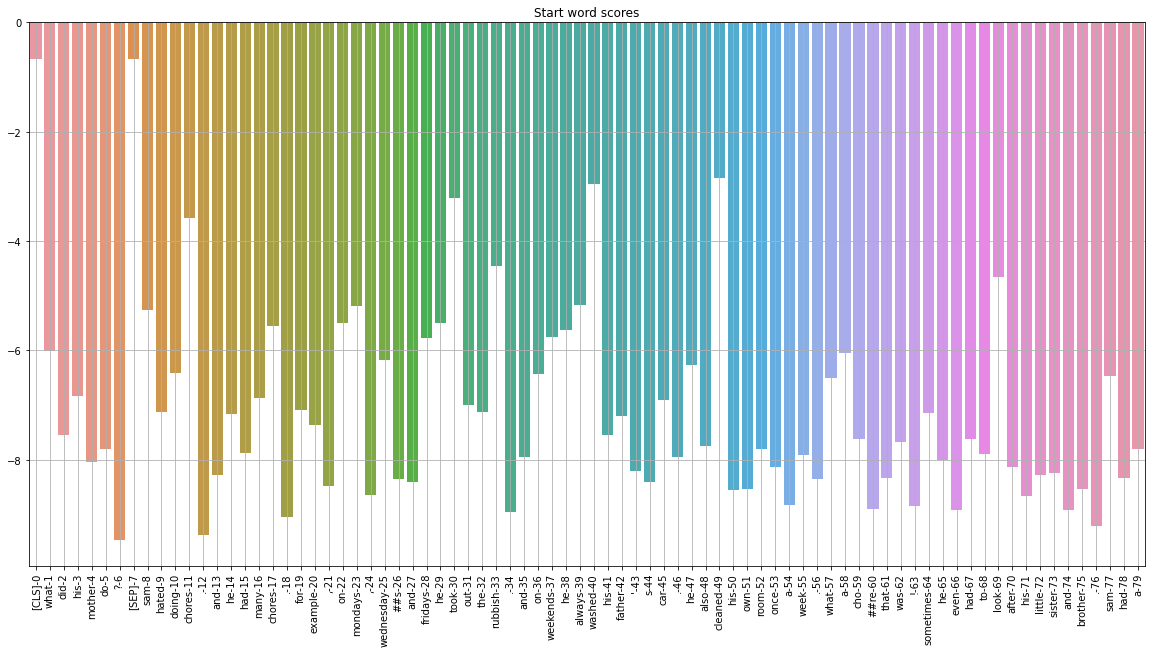

In [20]:
#first 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=start_scores[:80], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("Start word scores")
plt.show()

This code is similar to the previous one but focuses on the last 100 tokens rather than the first 100 tokens. Here's an explanation of the key elements:

### Key Elements:
1. **`plt.rcParams["figure.figsize"] = (20,10)`**:
   - Sets the plot's size (20 inches wide and 10 inches tall) for better readability, especially when dealing with many tokens.

2. **`sns.barplot(x=token_labels[-80:], y=start_scores[-80:], ci=None)`**:
   - `sns.barplot()` creates a bar plot with:
     - `x=token_labels[-80:]`: The last 80 tokens from the `token_labels` list are shown on the x-axis.
     - `y=start_scores[-80:]`: The corresponding "start scores" for the last 80 tokens are shown on the y-axis.
   - `ci=None` disables the confidence intervals around the bars, focusing only on the actual start scores.

3. **`ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")`**:
   - Rotates the x-axis labels (tokens) by 90 degrees for easier reading, especially when there are long token labels.
   - `ha="center"` ensures the labels are centered under each bar on the x-axis.

4. **`ax.grid(True)`**:
   - Adds gridlines to the plot for better visual clarity.

5. **`plt.title("Start word scores")`**:
   - Adds the title "Start word scores" to the plot, which helps to clarify what the plot is showing.

6. **`plt.show()`**:
   - Displays the plot with the data visualized.

### Purpose:
This visualization focuses on the last 80 tokens in the input (question and text) and their corresponding "start word scores" as predicted by the BERT model. The purpose is to examine which tokens in the latter part of the sequence are likely to mark the start of the answer. 

### Expected Output:
- The x-axis will show the last 80 tokens from the question and text.
- The y-axis will display the "start word scores," indicating the model's confidence in each token being the starting point of the answer.
- Tokens with higher "start scores" suggest that the model is confident that the answer begins at that token. 

This helps in analyzing how well the BERT model identifies the starting point of an answer within the entire context, including the later tokens of the input.

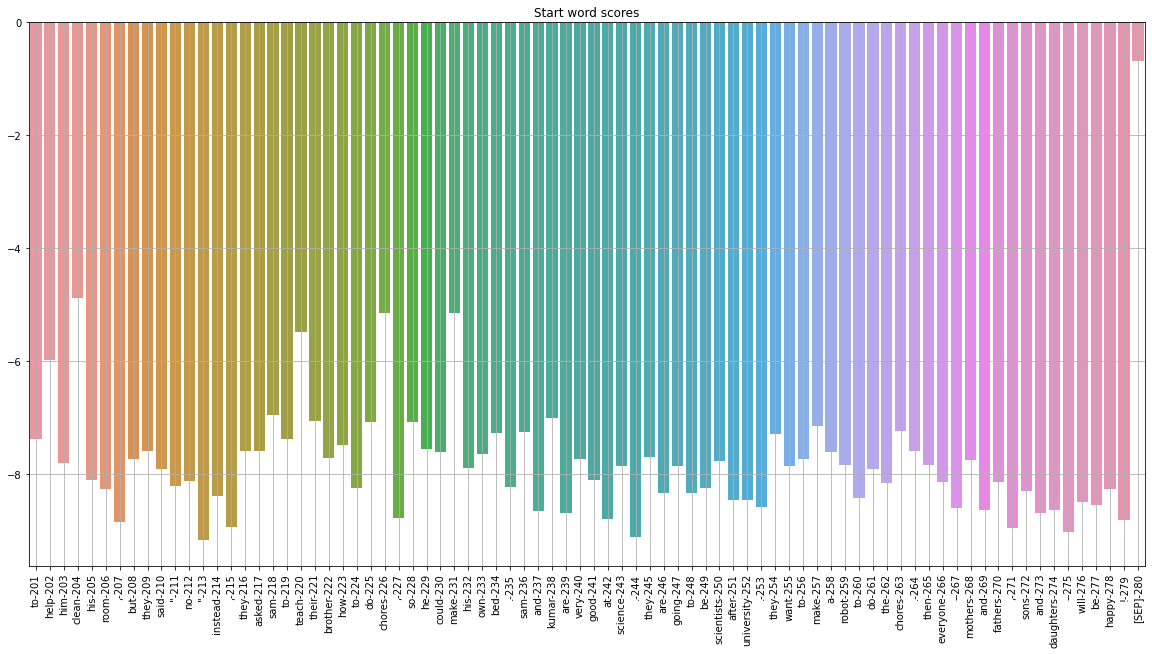

In [21]:
#last 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=start_scores[-80:], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("Start word scores")
plt.show()

This code is almost identical to the previous one, but it focuses on visualizing the "end word scores" rather than the "start word scores." Here's a breakdown of its key components:

### Key Elements:
1. **`plt.rcParams["figure.figsize"] = (20,10)`**:
   - Sets the size of the plot to 20 inches in width and 10 inches in height, ensuring it's large enough for clear visualization of the data.

2. **`sns.barplot(x=token_labels[:80], y=end_scores[:80], ci=None)`**:
   - `sns.barplot()` is used to create a bar plot, with:
     - `x=token_labels[:80]`: The first 80 tokens from the `token_labels` list displayed on the x-axis.
     - `y=end_scores[:80]`: The corresponding "end scores" for the first 80 tokens displayed on the y-axis.
   - `ci=None` disables the confidence intervals around the bars, focusing only on the actual end scores.

3. **`ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")`**:
   - Rotates the x-axis labels (tokens) by 90 degrees to make them easier to read, especially if they are long.
   - `ha="center"` ensures that the labels are centered directly beneath the bars.

4. **`ax.grid(True)`**:
   - Enables gridlines on the plot for easier interpretation of the values.

5. **`plt.title("End word scores")`**:
   - Adds the title "End word scores" to the plot, clarifying that it shows the confidence of the BERT model in predicting the end position of the answer.

6. **`plt.show()`**:
   - Displays the plot with the visualized data.

### Purpose:
This plot is designed to display the "end word scores" for the first 80 tokens in the question and text. The "end word scores" are the model's confidence scores for where the answer ends in the provided context. This helps identify which token in the input sequence (question + context) is predicted to mark the end of the answer.

### Expected Output:
- The x-axis will show the first 80 tokens from the input.
- The y-axis will represent the "end word scores," indicating the likelihood of each token being the ending point of the answer.
- Higher scores on the y-axis suggest that the corresponding token is predicted to be part of the answer's ending.

This visualization complements the "start word scores" plot, giving a full picture of where the BERT model believes the answer begins and ends in the text. Together, these plots allow you to analyze the model's behavior in locating the answer span within a given context.

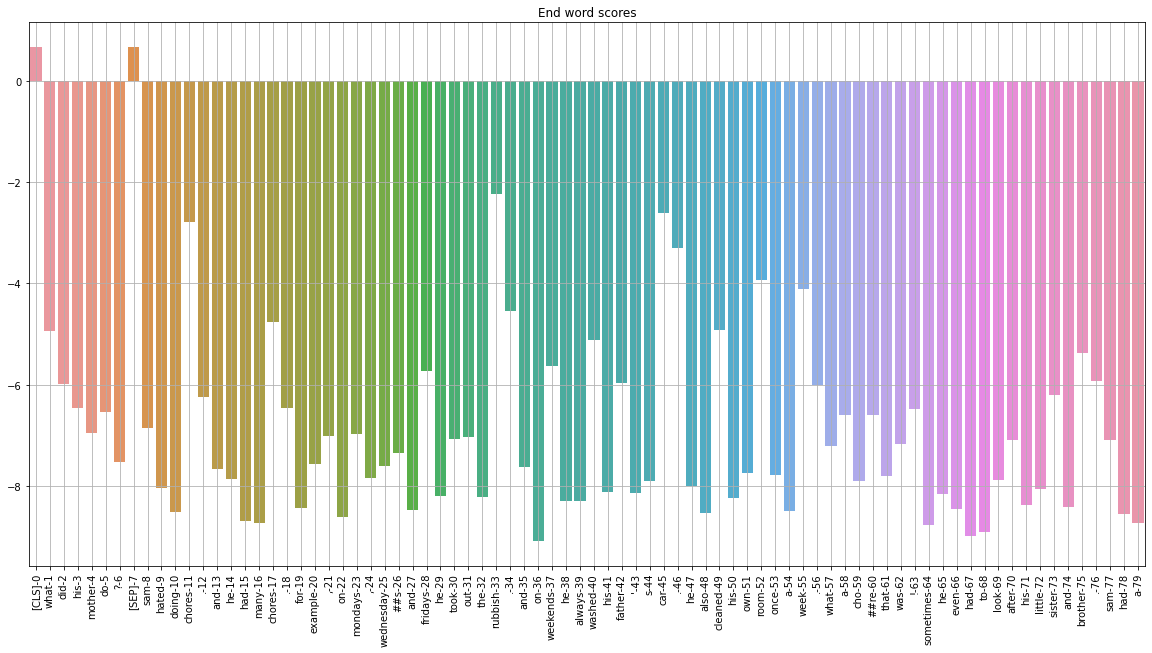

In [22]:
#first 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[:80], y=end_scores[:80], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("End word scores")
plt.show()

This code generates a bar plot of the "end word scores" for the last 80 tokens in the question-answering task. Here's a detailed explanation of the components of the code:

### Key Elements:
1. **`plt.rcParams["figure.figsize"] = (20,10)`**:
   - This line adjusts the figure size, setting it to 20 inches wide and 10 inches tall. This ensures the plot is large enough to display the information clearly.

2. **`ax = sns.barplot(x=token_labels[-80:], y=end_scores[-80:], ci=None)`**:
   - **`sns.barplot()`** creates the bar plot. The parameters are:
     - `x=token_labels[-80:]`: This selects the last 80 tokens from the `token_labels` list to be shown along the x-axis.
     - `y=end_scores[-80:]`: This selects the corresponding "end scores" for those 80 tokens, which will be plotted on the y-axis.
   - `ci=None` disables the confidence intervals around the bars, focusing solely on the "end scores" for each token.

3. **`ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")`**:
   - Rotates the x-axis labels (the tokens) by 90 degrees to make them easier to read, particularly for tokens that are long or close together.
   - The `ha="center"` parameter ensures that the labels are centered directly below the bars.

4. **`ax.grid(True)`**:
   - Enables gridlines on the plot, making it easier to interpret the data.

5. **`plt.title("End word scores")`**:
   - Adds a title to the plot that reads "End word scores," which indicates that this plot visualizes the model's confidence in predicting the end position of the answer.

6. **`plt.show()`**:
   - Displays the plot with the bars showing the "end word scores."

### Purpose of the Plot:
This plot visualizes the confidence scores that the BERT model assigns to each token in predicting the end of the answer. By focusing on the last 80 tokens in the sequence, it shows how the model evaluates the likelihood of each token being the end of the answer span within the context (text + question).

### Expected Output:
- **X-axis**: The last 80 tokens from the question and context combined.
- **Y-axis**: The corresponding end word scores, which represent how confident the model is about each token being part of the answer's end.
- The plot will help you understand which tokens the model is focusing on as potential endpoints for the answer, as well as visualize the model's confidence in its predictions.

This plot complements the "start word scores" plot, providing a more complete picture of how the model identifies the answer span in the input text. By analyzing both plots together, you can observe where the model believes the answer starts and ends within the given text.

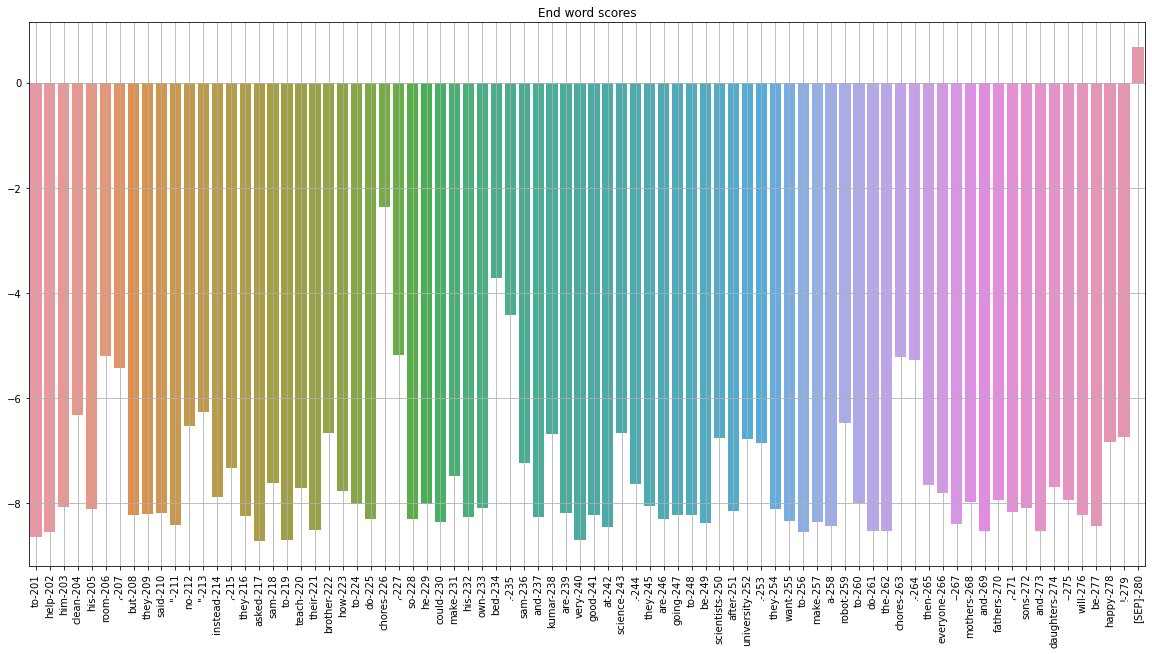

In [23]:
#last 100 tokens
plt.rcParams["figure.figsize"] = (20,10)
ax = sns.barplot(x=token_labels[-80:], y=end_scores[-80:], ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)
plt.title("End word scores")
plt.show()

This section of the code is responsible for reconstructing the answer from the predicted start and end positions. Here's a detailed explanation of each part:

### Code Breakdown:

1. **`answer = tokens[answer_start]`**:
   - The answer string is initialized with the token at the `answer_start` index. This is the first token in the predicted answer span.
   - `tokens[answer_start]` is a token from the input sequence that represents the beginning of the answer.

2. **`for i in range(answer_start + 1, answer_end + 1):`**:
   - This loop iterates through the tokens in the input sequence, starting from the token immediately following the start token (`answer_start + 1`) to the token at the predicted end position (`answer_end`).
   - It appends each token to the answer string, properly handling sub-word tokens that were split by BERT’s tokenizer.

3. **`if tokens[i][0:2] == "##":`**:
   - BERT uses a WordPiece tokenizer that splits words into smaller sub-word units if necessary. Sub-word tokens are prefixed with `"##"`.
   - This condition checks if the token starts with `"##"`, indicating that it is a sub-word token that should be joined to the previous token in the answer string.

4. **`answer += tokens[i][2:]`**:
   - If the token is a sub-word token (starts with `"##"`), this line removes the `"##"` prefix and appends the rest of the token to the answer string, effectively joining the sub-word with the previous token.

5. **`else:`**:
   - If the token is not a sub-word (i.e., it does not start with `"##"`), this part handles normal tokens that should be separated by a space.

6. **`answer += " " + tokens[i]`**:
   - For regular tokens, the token is appended to the answer string with a space before it, ensuring proper word separation.

### Purpose of This Code:

- The goal of this part of the code is to **reconstruct the complete answer** from the tokenized form.
- Since BERT’s tokenizer may split words into sub-word tokens (e.g., "playing" might be split into "play" and "##ing"), this code ensures that the sub-word tokens are correctly combined back into the full words as part of the answer string.
  
### Example:

Assuming the tokenized input is as follows:
- Input text: "The capital of France is Paris."
- Tokenized text: `["the", "capital", "of", "fr", "##ance", "is", "paris", "."]`

If the predicted answer span is from token index 3 (`"fr"`) to token index 4 (`"##ance"`), this code will combine those two sub-tokens into `"france"` and return it as the final answer.

### Final Output:
The `answer` variable will contain the full answer, even if it was split into sub-tokens by BERT's tokenizer. For example, if the answer span is `"capital of France"`, it will return `"capital of France"` correctly, without the sub-word `"##"` prefix in the middle of the word.

In [24]:
answer = tokens[answer_start]

for i in range(answer_start+1, answer_end+1):
    if tokens[i][0:2] == "##":
        answer += tokens[i][2:]
    else:
        answer += " " + tokens[i]

This code defines a function `question_answer` that uses the BERT model for answering questions based on a given text. Here's a detailed breakdown of the function:

### Function Overview:
The `question_answer` function takes a **question** and a **context text** as inputs and performs the following tasks:
- Tokenizes the input question and context.
- Passes the tokenized inputs through the pre-trained BERT model for question answering.
- Reconstructs the answer from the model’s predicted start and end positions.
- Handles cases where the answer is not found or the model fails to provide an answer.

### Code Breakdown:

1. **Tokenize the Question and Text**:
    - `input_ids = tokenizer.encode(question, text)`:
      - The question and the context text are tokenized and converted into input IDs using the `tokenizer.encode` method. These IDs represent the question and text as tokens that BERT can process.
    - `tokens = tokenizer.convert_ids_to_tokens(input_ids)`:
      - This converts the input IDs back to human-readable token format for reference when reconstructing the answer.

2. **Create Segment IDs**:
    - **First occurrence of `[SEP]` token**: 
      - The `[SEP]` token is used to separate the question from the context text. The index of this token is found using `input_ids.index(tokenizer.sep_token_id)`.
    - **Number of tokens in each segment**:
      - The question and the context text are treated as separate segments by BERT. Segment A (the question) has a length of `sep_idx + 1`, and Segment B (the context) has the remaining tokens.
    - **Segment IDs**: 
      - A list of segment IDs is created, with `0`s for the question segment (A) and `1`s for the context segment (B). This list is used to differentiate between the two segments when feeding data into BERT.
      - The segment IDs are checked to ensure they match the length of the input tokens using the assertion `assert len(segment_ids) == len(input_ids)`.

3. **Model Prediction**:
    - The input IDs and segment IDs are passed to the pre-trained BERT model:
      - `output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))`
    - The model outputs two logits (`start_logits` and `end_logits`), which represent the predicted positions of the answer span (start and end) in the tokenized input.

4. **Reconstructing the Answer**:
    - **Finding the start and end positions**:
      - `answer_start = torch.argmax(output.start_logits)` and `answer_end = torch.argmax(output.end_logits)` give the positions of the start and end of the answer span in the tokenized sequence.
    - **Reconstructing the full answer**:
      - The answer is initialized with a default message ("Unable to find the answer to your question.") in case the model fails to find a valid answer.
      - If the predicted end position is greater than or equal to the start position, the answer is reconstructed from the tokens between the start and end indices.
      - Sub-word tokens (tokens that start with "##") are handled by joining them with the previous token without any spaces.
      - The reconstructed answer is then formatted and printed.

5. **Handle Edge Cases**:
    - If the answer starts with `[CLS]`, it indicates that the model couldn’t find a valid answer, so the default message is returned.

### Example Flow:
- **Input**: 
  - `question = "Who is the president of the USA?"`
  - `text = "The president of the United States is Joe Biden."`
- **Process**:
  - The input question and text are tokenized and processed through the BERT model.
  - BERT predicts that the answer is "Joe Biden."
  - The answer is reconstructed and displayed.

### Output:
- The function will print:
  - **Answer**: "Joe Biden."
  - If no answer is found, it prints "Unable to find the answer to your question."

### Use Case:
This function is useful in scenarios where a question-answering model (like BERT) needs to answer specific questions based on a given passage of text. It can be applied in a variety of applications such as:
- **Automated customer support** (answering questions based on product manuals).
- **Educational tools** (answering questions based on textbooks or research papers).
- **Information retrieval systems** (extracting answers from documents or articles).

### Important Considerations:
- The model relies on the pre-trained BERT model fine-tuned on question answering tasks (e.g., SQuAD).
- Tokenization and segmenting the input text and question is crucial for the model to correctly differentiate between the question and the context.


In [25]:
def question_answer(question, text):
    
    #tokenize question and text in ids as a pair
    input_ids = tokenizer.encode(question, text)
    
    #string version of tokenized ids
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    
    #segment IDs
    #first occurence of [SEP] token
    sep_idx = input_ids.index(tokenizer.sep_token_id)

    #number of tokens in segment A - question
    num_seg_a = sep_idx+1

    #number of tokens in segment B - text
    num_seg_b = len(input_ids) - num_seg_a
    
    #list of 0s and 1s
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    
    assert len(segment_ids) == len(input_ids)
    
    #model output using input_ids and segment_ids
    output = model(torch.tensor([input_ids]), token_type_ids=torch.tensor([segment_ids]))
    
    #reconstructing the answer
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)
    
    # Initialize the answer variable with a default value
    answer = "Unable to find the answer to your question."

    if answer_end >= answer_start:
        answer = tokens[answer_start]
        for i in range(answer_start+1, answer_end+1):
            if tokens[i][0:2] == "##":
                answer += tokens[i][2:]
            else:
                answer += " " + tokens[i]
                
    if answer.startswith("[CLS]"):
        answer = "Unable to find the answer to your question."
    
#     print("Text:\n{}".format(text.capitalize()))
#     print("\nQuestion:\n{}".format(question.capitalize()))
    print("\nAnswer:\n{}".format(answer.capitalize()))

When we run the `question_answer(question, text)` function, it will output the answer based on the question and the provided text.

In [26]:
text = """New York (CNN) -- More than 80 Michael Jackson collectibles -- including the late pop star's famous rhinestone-studded glove from a 1983 performance -- were auctioned off Saturday, reaping a total $2 million. Profits from the auction at the Hard Rock Cafe in New York's Times Square crushed pre-sale expectations of only $120,000 in sales. The highly prized memorabilia, which included items spanning the many stages of Jackson's career, came from more than 30 fans, associates and family members, who contacted Julien's Auctions to sell their gifts and mementos of the singer. Jackson's flashy glove was the big-ticket item of the night, fetching $420,000 from a buyer in Hong Kong, China. Jackson wore the glove at a 1983 performance during \"Motown 25,\" an NBC special where he debuted his revolutionary moonwalk. Fellow Motown star Walter \"Clyde\" Orange of the Commodores, who also performed in the special 26 years ago, said he asked for Jackson's autograph at the time, but Jackson gave him the glove instead. "The legacy that [Jackson] left behind is bigger than life for me,\" Orange said. \"I hope that through that glove people can see what he was trying to say in his music and what he said in his music.\" Orange said he plans to give a portion of the proceeds to charity. Hoffman Ma, who bought the glove on behalf of Ponte 16 Resort in Macau, paid a 25 percent buyer's premium, which was tacked onto all final sales over $50,000. Winners of items less than $50,000 paid a 20 percent premium."""
question = "Where was the Auction held?"

question_answer(question, text)


Answer:
Hard rock cafe in new york ' s times square


The line of code provided will print the **original answer** to the question from the CoQA dataset. Here's how it works:

- `data.loc[data["question"] == question]` filters the DataFrame `data` to find the row where the "question" column matches the value of `question`.
- `.values[0]` accesses the answer from that row.

If the question is `"Where was the Auction held?"` in the context of your CoQA dataset, this will print the answer from the dataset corresponding to that question.

For example:

```python
print("Original answer:\n", data.loc[data["question"] == question]["answer"].values[0])
```

If the CoQA dataset contains a matching entry for this question, the output might look like:

```
Original answer:
 The auction was held at the Hard Rock Cafe in New York's Times Square.
```

This output reflects the correct answer to the question according to the CoQA dataset.

In [27]:
print("Original answer:\n", data.loc[data["question"] == question]["answer"].values[0])

Original answer:
 Hard Rock Cafe


The code provided is an interactive loop where the user can input a text and a question and the model will answer the question based on the provided text. After the answer is provided, the user is given the option to ask another question or exit the loop.

### Here's how the code works:
1. **Input Text and Question**:
   - The user is prompted to input a block of text and a question related to that text.
   
2. **Loop for Multiple Questions**:
   - The loop continues to prompt the user to enter new questions related to the same text.
   - After answering a question, the user is asked whether they want to ask another question.
   - If the user answers "Y", the next question is asked and answered.
   - If the user answers "N", the loop ends and a "Bye!" message is printed.
   
3. **Condition to Exit**:
   - The `flag_N` variable is used to exit the outer loop once the user has decided not to ask further questions.

### Example Scenario:

**User Flow**:
1. The user provides a text passage and a question.
   
   ```
   Please enter your text:
   New York (CNN) -- More than 80 Michael Jackson collectibles were auctioned off at the Hard Rock Cafe in New York's Times Square.
   
   Please enter your question:
   Where was the auction held?
   ```

2. The model will process the input and provide an answer to the question.
   
   ```
   Answer: The auction was held at the Hard Rock Cafe in New York's Times Square.
   ```

3. After the answer is provided, the user will be asked if they want to ask another question.

   ```
   Do you want to ask another question based on this text (Y/N)? Y
   Please enter your question:
   What was sold at the auction?
   ```

4. The user can keep asking questions or type "N" to exit the loop.

**Exit Scenario**:
   ```
   Do you want to ask another question based on this text (Y/N)? N
   Bye!
   ```

### Purpose of the Code:
- This allows the user to interactively ask multiple questions about a given text and receive answers using the pre-trained BERT-based model for question answering.
- The loop ensures that the user can continue querying until they choose to stop.

This kind of setup could be useful for building an interactive FAQ system or any system where users want to ask questions about a specific context or document.

In [29]:
text = input("Please enter your text: \n")
question = input("\nPlease enter your question: \n")

while True:
    question_answer(question, text)
    
    flag = True
    flag_N = False
    
    while flag:
        response = input("\nDo you want to ask another question based on this text (Y/N)? ")
        if response[0] == "Y":
            question = input("\nPlease enter your question: \n")
            flag = False
        elif response[0] == "N":
            print("\nBye!")
            flag = False
            flag_N = True
            
    if flag_N == True:
        break

Please enter your text: 
Once upon a time in a quiet village nestled in the hills, there lived a young boy named Eli. He was known for his kind heart and adventurous spirit. Every day, Eli would explore the woods nearby, marveling at the beauty of nature and discovering hidden places. One sunny afternoon, as he wandered deeper into the forest than ever before, he stumbled upon an old, abandoned cabin. Curiosity got the better of him, and he decided to take a closer look.  As he entered the cabin, he found a dusty old chest in the corner. It was locked, but there was a small key hanging from a rusty nail above it. Eli, with his usual bravery, grabbed the key and unlocked the chest. To his amazement, inside were scrolls of ancient maps and a golden compass. The moment he touched the compass, the room seemed to glow with a soft, magical light. It was then that he realized the compass had the power to lead him to any place he wished to go.  Excited, Eli decided to embark on a new adventure